<a href="https://colab.research.google.com/github/Akshay-Khetre/Data_Visualisation/blob/main/Iris_Decision_Tree_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [311]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [312]:
import warnings

warnings.filterwarnings('ignore')

In [313]:
data ='/content/Iris.csv'


df = pd.read_csv(data, header=None)

In [314]:
df.shape

(151, 6)

In [315]:
df.head()

,0,1,2,3,4,5
0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,1,5.1,3.5,1.4,0.2,Iris-setosa
2,2,4.9,3,1.4,0.2,Iris-setosa
3,3,4.7,3.2,1.3,0.2,Iris-setosa
4,4,4.6,3.1,1.5,0.2,Iris-setosa


In [316]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       151 non-null    object
 1   1       151 non-null    object
 2   2       151 non-null    object
 3   3       151 non-null    object
 4   4       151 non-null    object
 5   5       151 non-null    object
dtypes: object(6)
memory usage: 7.2+ KB


In [317]:
col_names = ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

df.columns = col_names
for col in col_names:
    
    print(df[col].value_counts())

Id     1
95     1
97     1
98     1
99     1
      ..
51     1
52     1
53     1
54     1
150    1
Name: Id, Length: 151, dtype: int64
5                10
5.1               9
6.3               9
6.7               8
5.7               8
6.4               7
5.8               7
5.5               7
4.9               6
5.4               6
5.6               6
6.1               6
6                 6
6.5               5
4.8               5
6.2               4
6.9               4
7.7               4
5.2               4
4.6               4
7.2               3
5.9               3
4.4               3
6.8               3
6.6               2
4.7               2
7.3               1
7.6               1
7.4               1
SepalLengthCm     1
7.1               1
7                 1
5.3               1
4.5               1
4.3               1
7.9               1
Name: SepalLengthCm, dtype: int64
3               26
2.8             14
3.2             13
3.1             12
3.4             12
2.9             

In [318]:
df['Species'].value_counts()


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Species             1
Name: Species, dtype: int64

In [319]:
df.isnull().sum()


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [320]:
X = df.drop(['Species'], axis=1)

y = df['Species']

In [321]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50, random_state = 42)

In [322]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((75, 5), (76, 5))

In [323]:
X_train.dtypes

Id               object
SepalLengthCm    object
SepalWidthCm     object
PetalLengthCm    object
PetalWidthCm     object
dtype: object

In [324]:
X_train.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
104,104,6.3,2.9,5.6,1.8
62,62,5.9,3,4.2,1.5
86,86,6,3.4,4.5,1.6
95,95,5.6,2.7,4.2,1.3
53,53,6.9,3.1,4.9,1.5


In [325]:
!pip install category_encoders


In [326]:
import category_encoders as ce


In [327]:
encoder = ce.OrdinalEncoder(cols=['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [328]:
X_train.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
104,1,1,1,1,1
62,2,2,2,2,2
86,3,3,3,3,3
95,4,4,4,2,4
53,5,5,5,4,2


In [329]:
X_test.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
76,-1.0,23.0,2.0,22.0,9.0
18,-1.0,25.0,19.0,5.0,10.0
82,-1.0,12.0,20.0,-1.0,8.0
81,-1.0,12.0,20.0,-1.0,11.0
143,-1.0,17.0,4.0,18.0,16.0


In [330]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [331]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [332]:
y_pred_gini = clf_gini.predict(X_test)


In [333]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8026


In [334]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versi

In [335]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.8533


In [336]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.8533
Test set score: 0.8026


[Text(0.5416666666666666, 0.875, 'X[4] <= 11.5\ngini = 0.663\nsamples = 75\nvalue = [22, 28, 25]'),
 Text(0.3333333333333333, 0.625, 'X[4] <= 4.5\ngini = 0.592\nsamples = 55\nvalue = [20, 28, 7]'),
 Text(0.16666666666666666, 0.375, 'X[4] <= 1.5\ngini = 0.397\nsamples = 22\nvalue = [0, 16, 6]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.278\nsamples = 6\nvalue = [0, 1, 5]'),
 Text(0.25, 0.125, 'gini = 0.117\nsamples = 16\nvalue = [0, 15, 1]'),
 Text(0.5, 0.375, 'X[4] <= 5.5\ngini = 0.5\nsamples = 33\nvalue = [20, 12, 1]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.0\nsamples = 12\nvalue = [12, 0, 0]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.526\nsamples = 21\nvalue = [8, 12, 1]'),
 Text(0.75, 0.625, 'X[2] <= 13.5\ngini = 0.18\nsamples = 20\nvalue = [2, 0, 18]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 17\nvalue = [0, 0, 17]'),
 Text(0.8333333333333334, 0.375, 'X[1] <= 18.5\ngini = 0.444\nsamples = 3\nvalue = [2, 0, 1]'),
 Text(0.75, 0.125, 'gini = 0.0\nsamples = 1

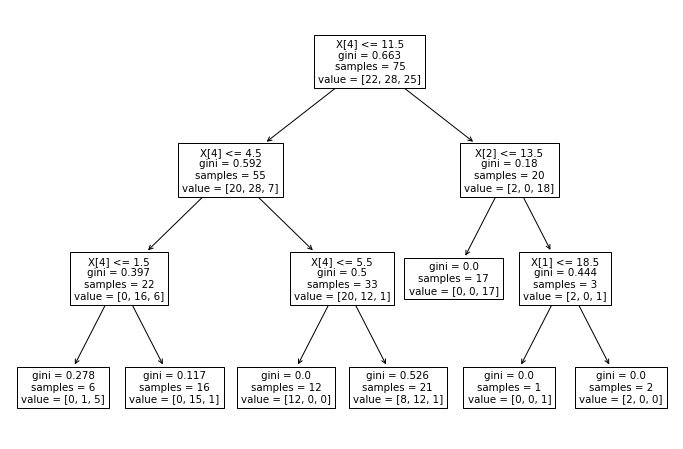

In [337]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [339]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [340]:
y_pred_en = clf_en.predict(X_test)

In [341]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8026


In [342]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versi

In [343]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.8533


In [344]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.8533
Test set score: 0.8026


[Text(0.5416666666666666, 0.875, 'X[4] <= 11.5\nentropy = 1.578\nsamples = 75\nvalue = [22, 28, 25]'),
 Text(0.3333333333333333, 0.625, 'X[4] <= 4.5\nentropy = 1.405\nsamples = 55\nvalue = [20, 28, 7]'),
 Text(0.16666666666666666, 0.375, 'X[4] <= 1.5\nentropy = 0.845\nsamples = 22\nvalue = [0, 16, 6]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.65\nsamples = 6\nvalue = [0, 1, 5]'),
 Text(0.25, 0.125, 'entropy = 0.337\nsamples = 16\nvalue = [0, 15, 1]'),
 Text(0.5, 0.375, 'X[4] <= 5.5\nentropy = 1.121\nsamples = 33\nvalue = [20, 12, 1]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.0\nsamples = 12\nvalue = [12, 0, 0]'),
 Text(0.5833333333333334, 0.125, 'entropy = 1.201\nsamples = 21\nvalue = [8, 12, 1]'),
 Text(0.75, 0.625, 'X[2] <= 13.5\nentropy = 0.469\nsamples = 20\nvalue = [2, 0, 18]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 17\nvalue = [0, 0, 17]'),
 Text(0.8333333333333334, 0.375, 'X[1] <= 18.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 0, 1]'),
 Text(0.

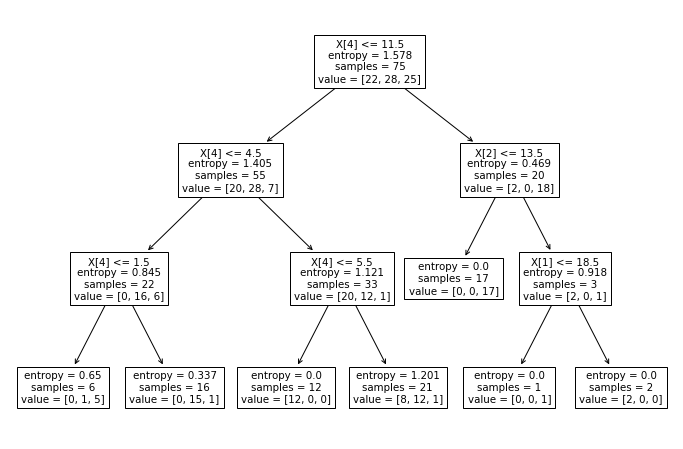

In [345]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

In [346]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[17  5  6  0]
 [ 0 21  1  0]
 [ 0  2 23  0]
 [ 0  0  1  0]]


In [347]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.61      0.76        28
Iris-versicolor       0.75      0.95      0.84        22
 Iris-virginica       0.74      0.92      0.82        25
        Species       0.00      0.00      0.00         1

       accuracy                           0.80        76
      macro avg       0.62      0.62      0.60        76
   weighted avg       0.83      0.80      0.79        76

